#### 순환신경망으로 IMDB 리뷰 분류하기

*   혼자 공부하는 머신러닝+딥러닝 09-2 예제



##### imdb 데이터셋 준비

In [ ]:
from tensorflow.keras.datasets import imdb
#전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용(나오지 않는 단어는 2로 변환됨.)
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
print("train_input.shape :", train_input.shape, "test_input.shape :", test_input.shape)

train_input.shape : (25000,) test_input.shape : (25000,)


In [ ]:
print(len(train_input[0]))
print(len(train_input[1]))

218
189


In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
# train set과 validation set 나누기
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2)

In [ ]:
# 리뷰의 길이 확인
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(lengths)

[350 146 341 ...  63 140 311]


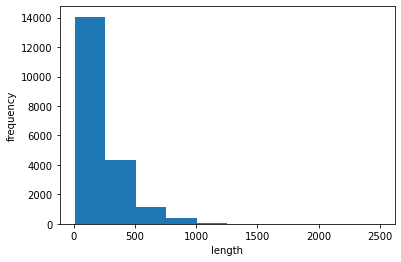

In [ ]:
# 히스토그램
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
# 리뷰 길이 100으로 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)
print(train_seq.shape)
print(val_seq.shape)

(20000, 100)
(5000, 100)


##### 순환신경망 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()

# 순환층의 뉴런 8개, 리뷰 길이 100, 500종류의 단어
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
# 이진 분류, 뉴런 1개, 시그모이드 활성화 함수
model.add(keras.layers.Dense(1, activation='sigmoid'))

원-핫 인코딩 사용

In [ ]:
train_onehot = keras.utils.to_categorical(train_seq)
print(train_onehot.shape)

(20000, 100, 500)


In [ ]:
val_onehot = keras.utils.to_categorical(val_seq)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
earlt_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_onehot, train_target, epochs=100, batch_size=64, validation_data=(val_onehot, val_target), callbacks=[checkpoint_cb,earlt_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 36ms/step - loss: 0.6984 - accuracy: 0.5053 - val_loss: 0.6956 - val_accuracy: 0.5134
Epoch 2/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6928 - accuracy: 0.5182 - val_loss: 0.6921 - val_accuracy: 0.5240
Epoch 3/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6900 - accuracy: 0.5348 - val_loss: 0.6905 - val_accuracy: 0.5332
Epoch 4/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6875 - accuracy: 0.5440 - val_loss: 0.6883 - val_accuracy: 0.5496
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6848 - accuracy: 0.5551 - val_loss: 0.6867 - val_accuracy: 0.5524
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6820 - accuracy: 0.5662 - val_loss: 0.6846 - val_accuracy: 0.5604
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6785 - accuracy: 0.5756 - val_loss: 0.6819 - val_ac

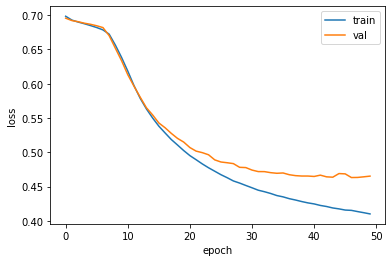

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

단어 임베딩 사용(word_embedding)

In [ ]:
model2 = keras.Sequential()
#500개의 토큰을 크기가 16인 벡터로 변경.
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
earlt_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb,earlt_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 17ms/step - loss: 0.6927 - accuracy: 0.5174 - val_loss: 0.6901 - val_accuracy: 0.5304
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6740 - accuracy: 0.6040 - val_loss: 0.6558 - val_accuracy: 0.6556
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6330 - accuracy: 0.6907 - val_loss: 0.6199 - val_accuracy: 0.7120
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6030 - accuracy: 0.7266 - val_loss: 0.5987 - val_accuracy: 0.7310
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5810 - accuracy: 0.7417 - val_loss: 0.5815 - val_accuracy: 0.7340
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5648 - accuracy: 0.7499 - val_loss: 0.5641 - val_accuracy: 0.7518
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.5518 - accuracy: 0.7548 - val_loss: 0.5592 - val_accuracy:

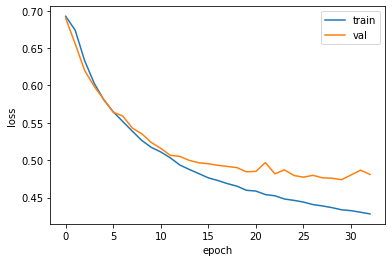

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [5]:
!git remote add origin https://github.com/LaonMoon/RNN-STUDY.git
!git branch -M master
!git push -u origin master

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
